In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

### Tarea 1. Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

[0.396484375, 0.4296875, 0.3984375, 0.390625, 0.392578125, 0.388671875, 0.4140625] [6, 12, 15, 20, 21, 88, 100]


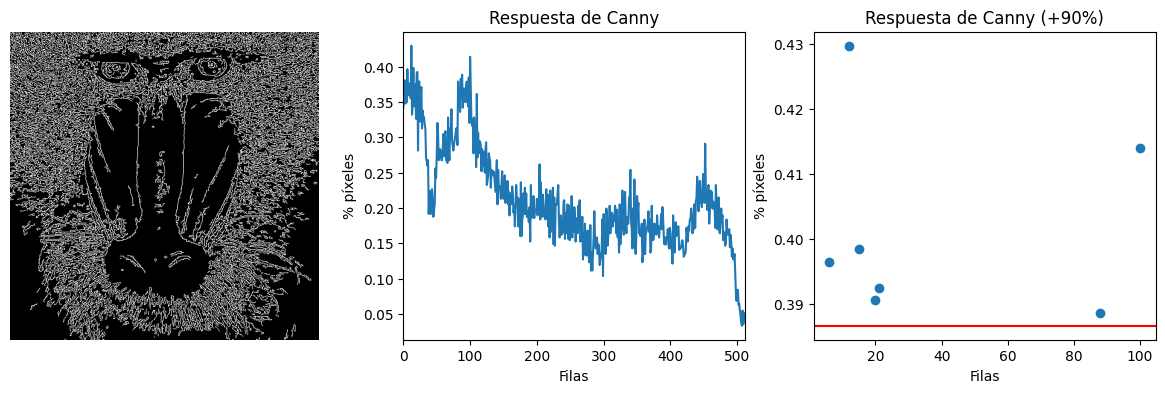

In [ ]:
# El contenido de la imagen resultado de Canny, son valores 0 o 255
# Cuenta el número de píxeles blancos (255) por fila
# Suma los valores de los pixeles por fila
# Row
img = cv2.imread('mandril.jpg') 
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Convierte el array de N arrays de 1 elemento en un array de N elementos
row_counts = row_counts.reshape((len(row_counts)))
# rows
rows = row_counts / (255 * canny.shape[0])

# Guardamos en 'maxfil' el valor máximo de blancos en para filas
maxfil = rows.max()
# Creamos un array para guardar las filas cuyo valor de blancos sea mayor que el 90% de 'maxfil'
max_rows_values = []
max_rows_indexes = []
for i in range(len(rows)):
    if rows[i] >= 0.9*maxfil:
        max_rows_values.append(float(rows[i]))
        max_rows_indexes.append(i)
print(max_rows_values, max_rows_indexes)

# Muestra Canny
fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(15, 4))
ax1.set_axis_off()
ax2.set_title("Canny")
ax1.imshow(canny, cmap='gray') 

# Muestra píxeles blancos por filas
ax2.set_title("Respuesta de Canny")
ax2.set_xlabel("Filas")
ax2.set_ylabel("% píxeles")
ax2.plot(rows)
# Rango en x definido por las filas
ax2.set_xlim([0, len(row_counts)])

# Muestra valor de píxeles blancos mayores que el 90% de maxfil
ax3.set_title("Respuesta de Canny (+90%)")
ax3.set_xlabel("Filas")
ax3.set_ylabel("% píxeles")
ax3.axhline(maxfil*0.9, color='red')
x = np.array(max_rows_indexes)
y = np.array(max_rows_values)
ax3.plot(x, y, 'o')
